In [1]:
%matplotlib inline

import pickle
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

In [2]:
filename = "past_data/learn_longer_data" 

# Getting back the objects:
with open(filename, 'rb') as f:
    stats, funds_wealth_all_episodes, funds_returns, learning_fund_stats = pickle.load(f)

# Returns

In [3]:
funds_returns = np.array(funds_returns)

In [154]:
learning_fund_return = funds_returns.T[-1]

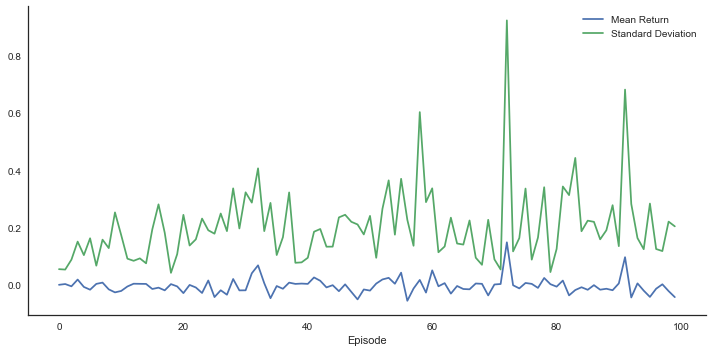

In [155]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(learning_fund_return.mean(axis=0), label='Mean Return')
ax.plot(learning_fund_return.std(axis=0), label='Standard Deviation')
ax.set_xlabel("Episode")
ax.legend()


fig.tight_layout()
sns.despine()

#timestr = time.strftime("%Y%m%d-%H%M%S")

#filename = timestr + "_return"

#fig.savefig("./figures/paper/%s.png" % filename)

In [38]:
total_stds = []
for k in range(11):
    fund_return = funds_returns.T[k]
    total_stds.append(fund_return.std())
total_stds = np.array(total_stds)

In [90]:
stds = pd.DataFrame(total_stds, index=[(i+1)*5 for i in range(11)])
stds.reset_index(inplace=True)
stds.columns = ["Beta", "Standard Deviation"]
stds.loc[10,"Beta"] = "Learning Fund"
print(stds.to_latex(index=False, column_format="cc"))

\begin{tabular}{cc}
\toprule
          Beta &  Standard Deviation \\
\midrule
             5 &            0.013396 \\
            10 &            0.026624 \\
            15 &            0.048302 \\
            20 &            0.072823 \\
            25 &            0.083543 \\
            30 &            0.113884 \\
            35 &            0.147813 \\
            40 &            0.156925 \\
            45 &            0.190544 \\
            50 &            0.221861 \\
 Learning Fund &            0.243072 \\
\bottomrule
\end{tabular}



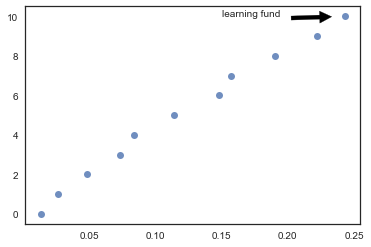

In [54]:
sns.regplot(total_stds, np.array([i for i in range(11)]),fit_reg=False)
plt.annotate('learning fund', xy=(0.24, 10), xytext=(0.15, 10),
            arrowprops=dict(facecolor='black', shrink=0.15),
            );

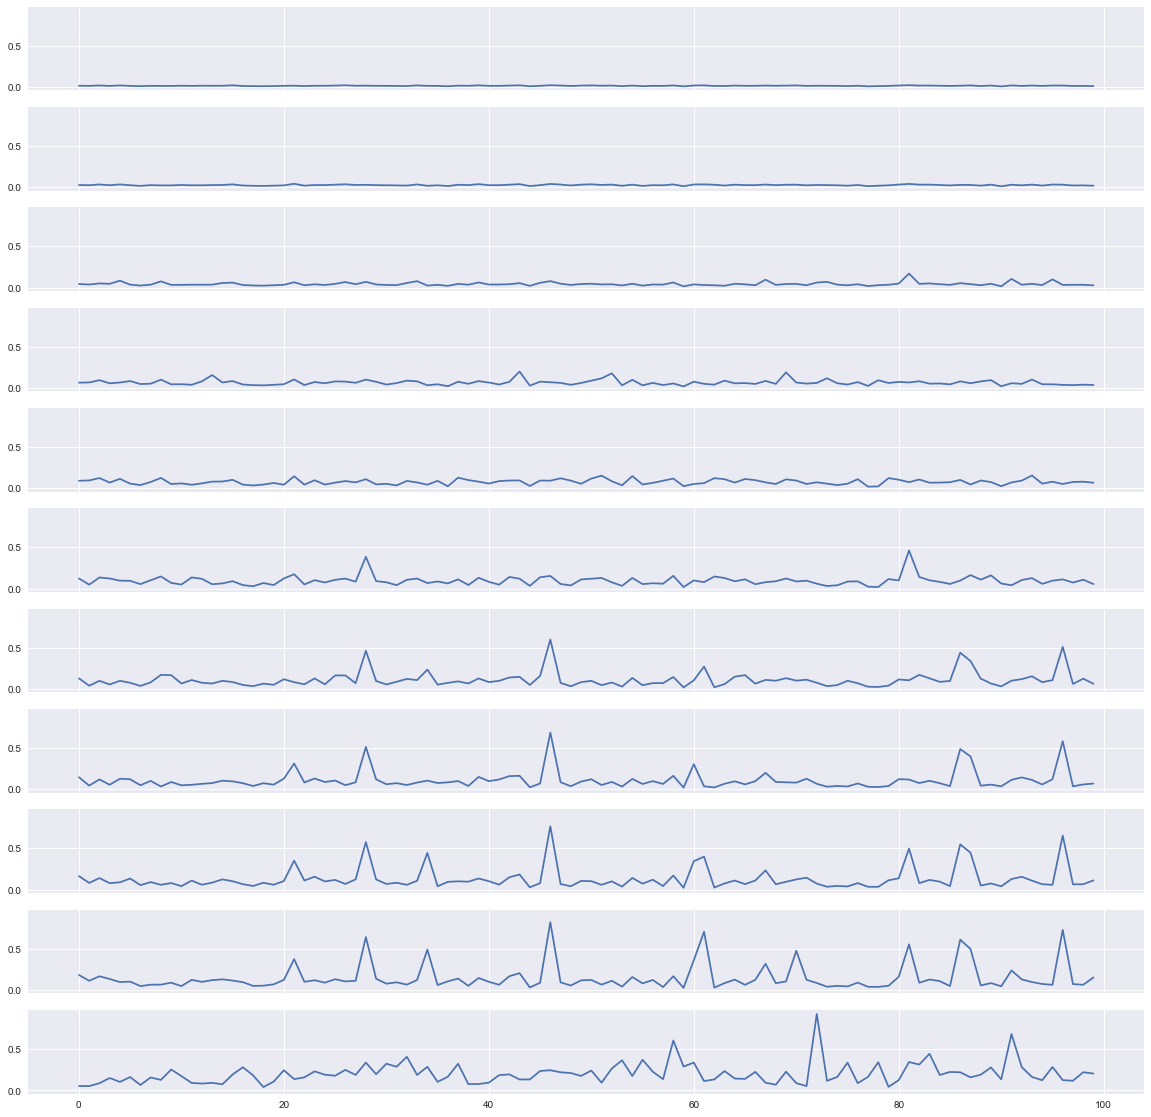

In [53]:
# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=11, ncols=1,
                         sharex=True, sharey=True,
                         figsize=(20,20)
                        )

for i, ax in enumerate(axes.flatten()):
    fund_return = funds_returns.T[i]
    ax.plot(fund_return.std(axis=0))

# Wealth

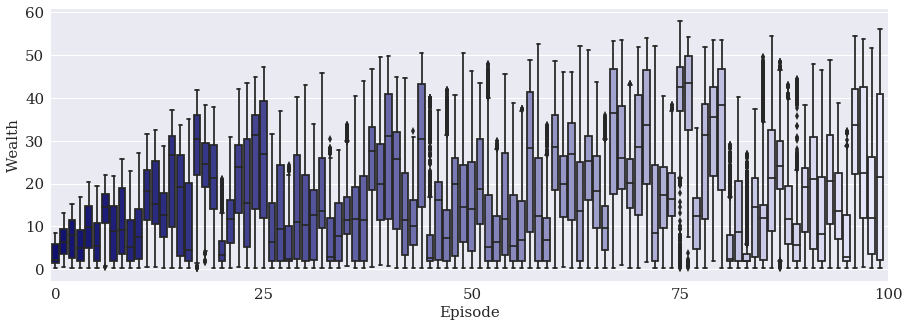

In [14]:
learning_fund_wealth = np.array(funds_wealth_all_episodes).T[-1]

fig, ax = plt.subplots(figsize=(15,5))

sns.boxplot(data=learning_fund_wealth, palette=sns.light_palette("navy", reverse=True, n_colors=100))

sns.despine()
ax.set_xlabel("Episode")
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels([0, 25, 50, 75, 100])
ax.set_ylabel("Wealth");

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
    item.set_fontname('serif')

timestr = time.strftime("%Y%m%d-%H%M%S")

filename = timestr + "_learning_boxes"

#fig.savefig("./figures/paper/%s.png" % filename)

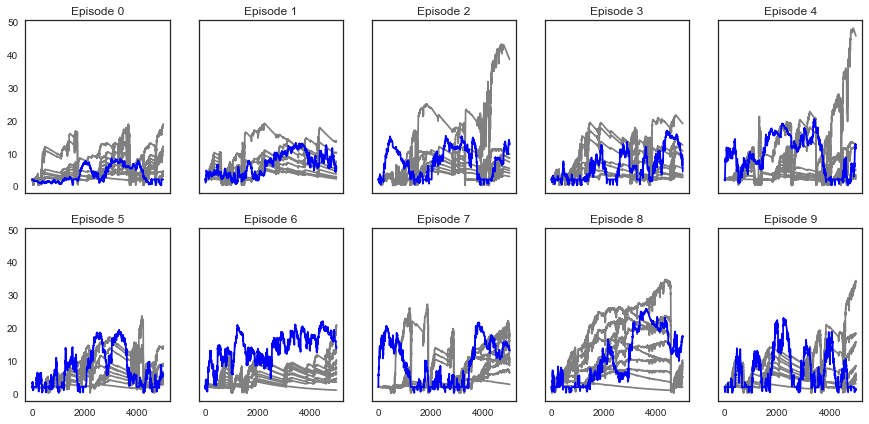

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=5,
                         sharex=True, sharey=True,
                         figsize=(15,7)
                        )

for i, ax in enumerate(axes.flatten()):

#    ax.set_ylim([0,100])

    for j in range(11):
        episode = np.array(funds_wealth_all_episodes[i])

        # plot the learning fund blue
        if j == 10:
            ax.plot(episode.T[j], color='blue')
        else:
            ax.plot(episode.T[j], color='gray')

    ax.set_title("Episode {}".format(i), #{'fontsize':20}
                )
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

# Saving
#fig.savefig("./figures/{}_total_wealth.png".format(experiment_name))

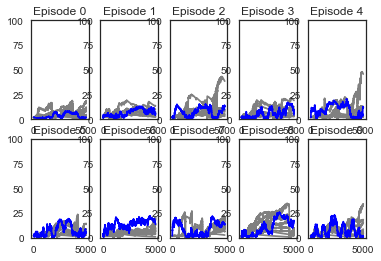

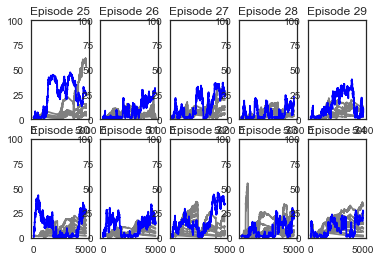

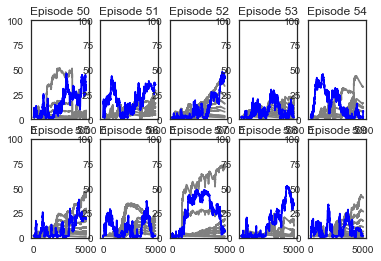

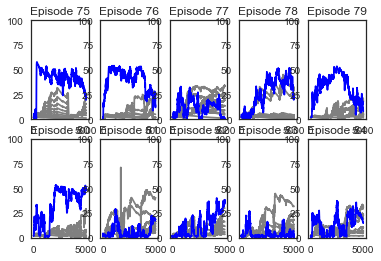

In [92]:
for branch in range(4):
    # assumes (nrows x ncols) episodes
    fig, axes = plt.subplots(nrows=5, ncols=5,
                             #sharex=True, sharey=True,
                             figsize=(10,20)
                            )

    for i, ax in enumerate(axes.flatten()):
        
        i += branch*25
        
        ax.set_ylim([0,100])

        for j in range(11):
            episode = np.array(funds_wealth_all_episodes[i])

            # plot the learning fund blue
            if j == 10:
                ax.plot(episode.T[j], color='blue')
            else:
                ax.plot(episode.T[j], color='gray')

        ax.set_title("Episode {}".format(i), #{'fontsize':20}
                    )
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

# Saving
#fig.savefig("./figures/{}_total_wealth.png".format(experiment_name))

# Learning Fund

In [27]:
bankruptcies_per_episode = []

for episode_i in learning_fund_stats:
    bankruptcies = 0
    wealth = episode_i.T[2]
    for t in range(len(wealth)):
        if (wealth[t] == 2.) and (wealth[t-1] != 2.):
            bankruptcies += 1

    bankruptcies_per_episode.append(bankruptcies)

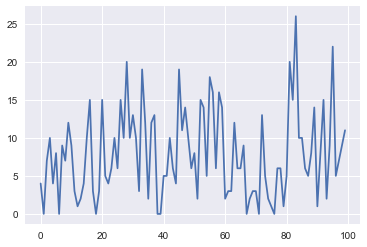

In [28]:
plt.plot(bankruptcies_per_episode);

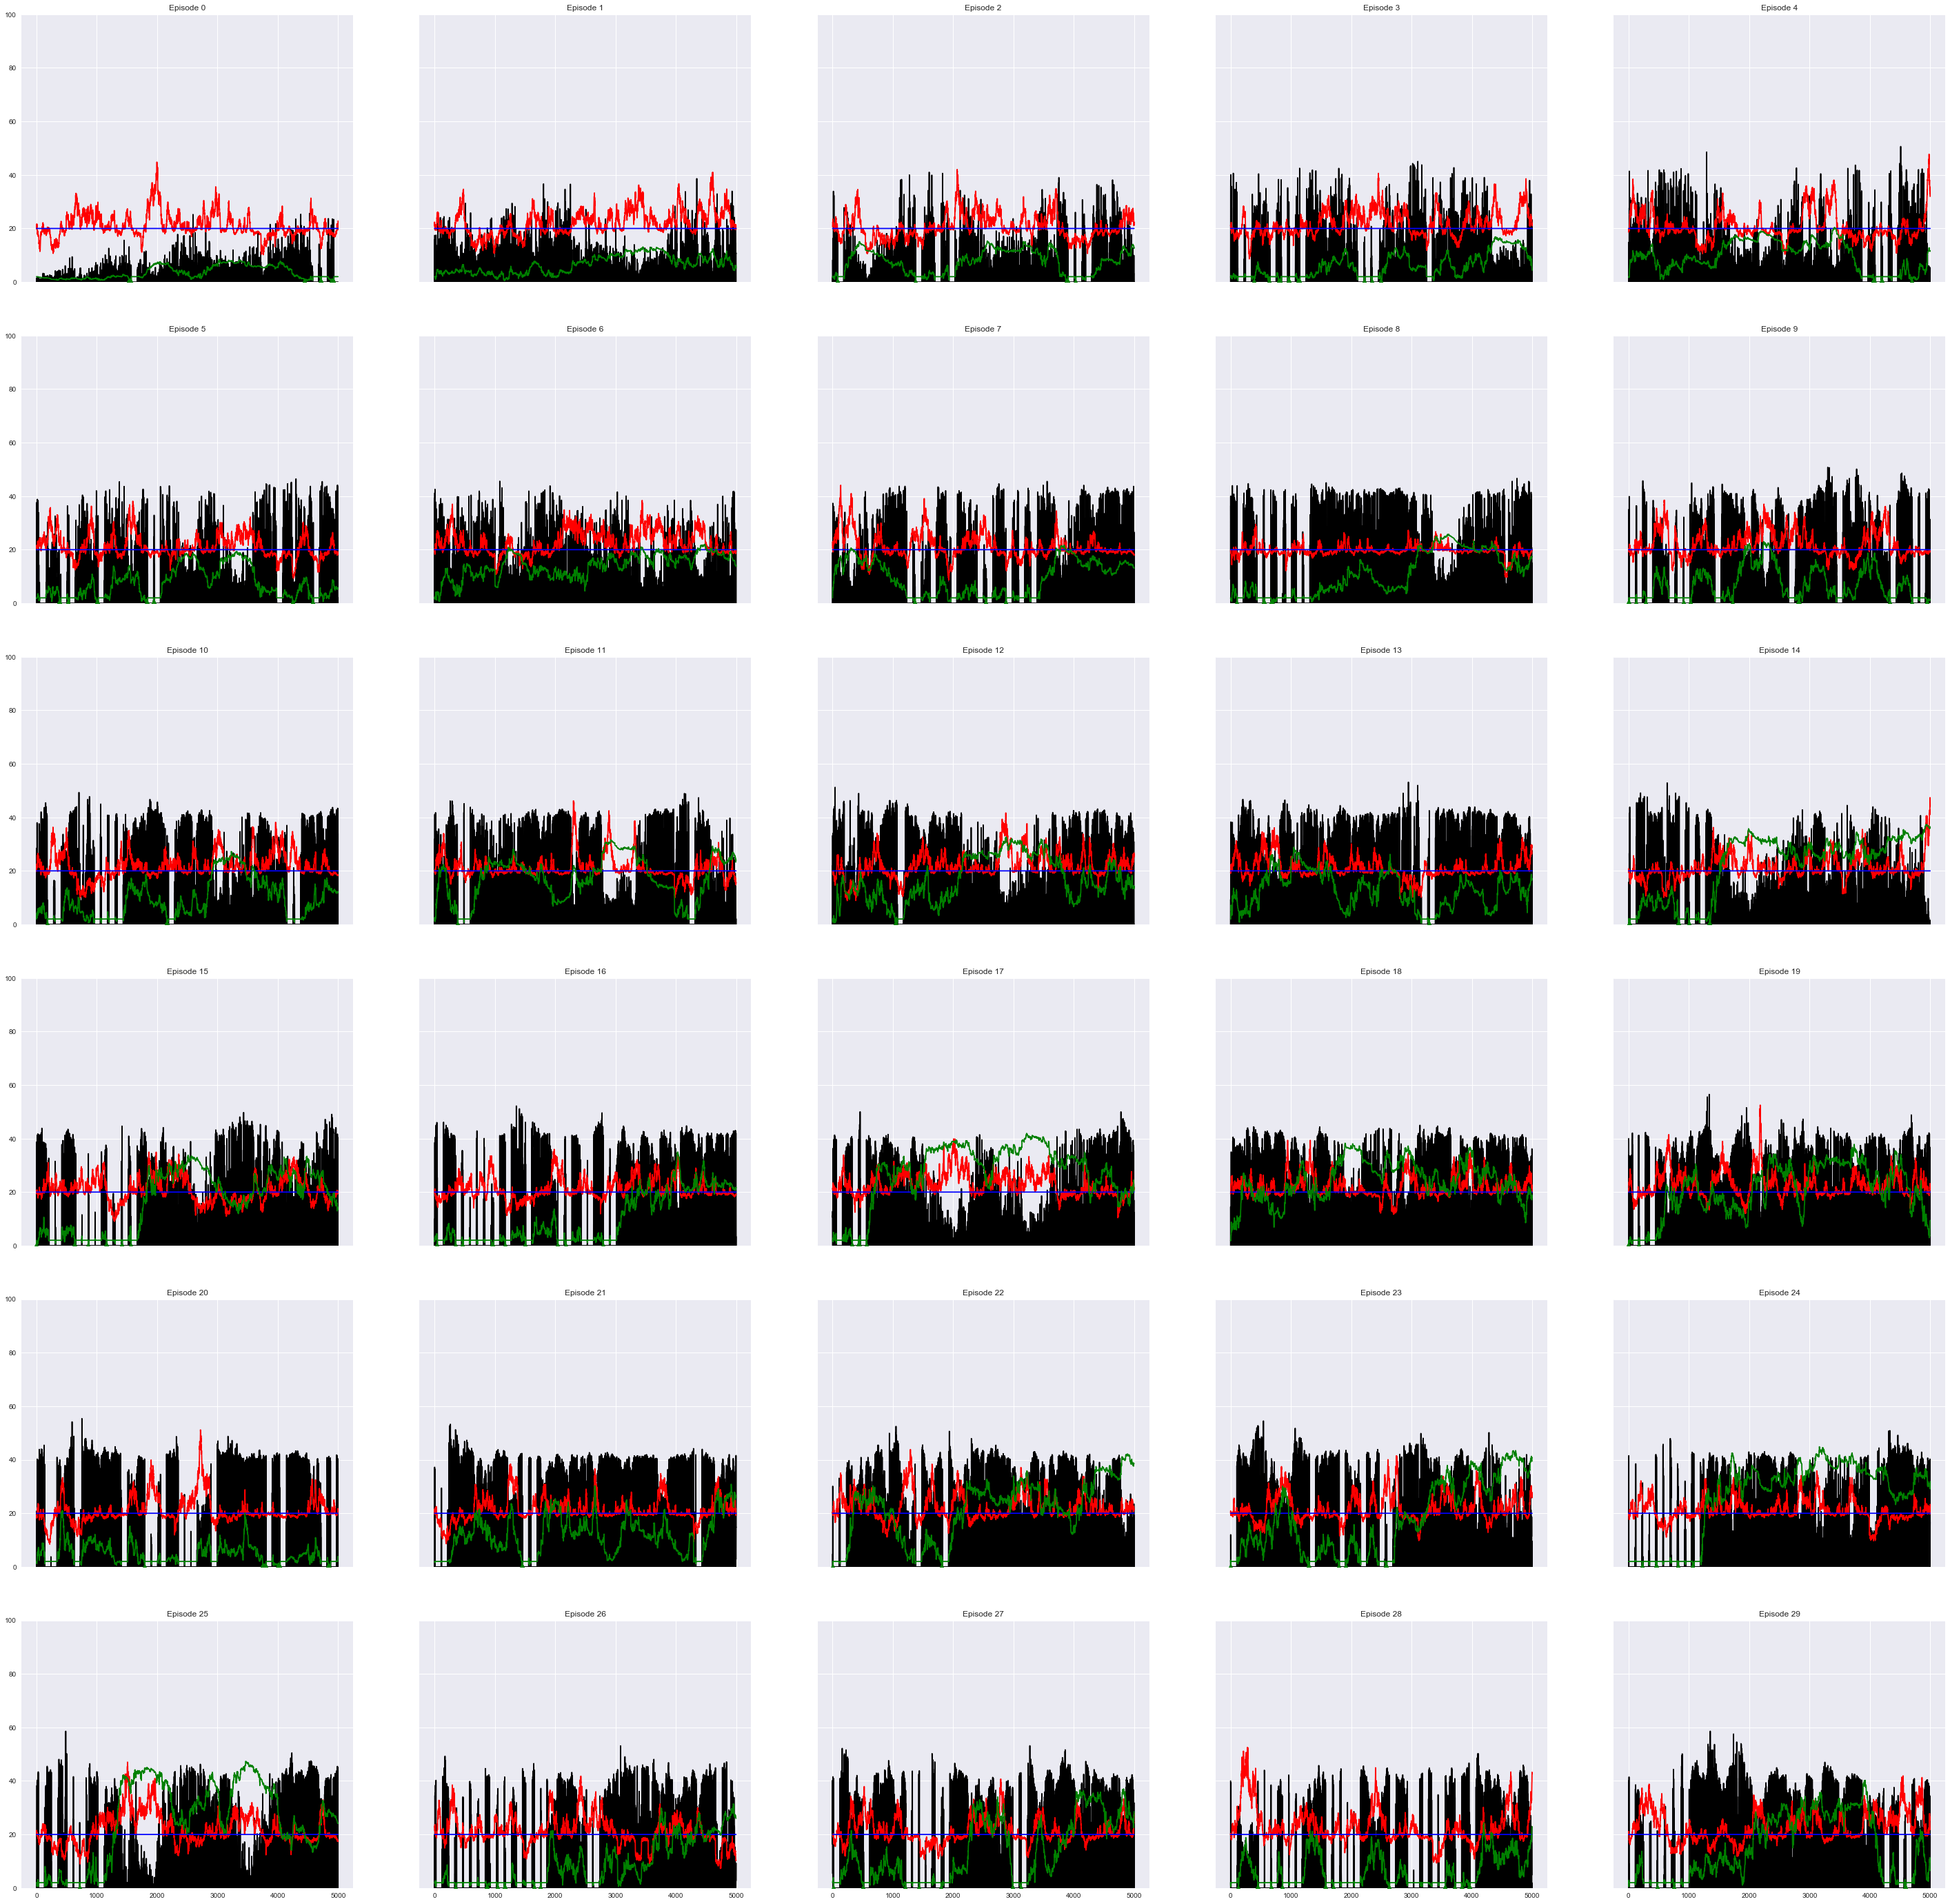

In [29]:
# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=6, ncols=5,
                         sharex=True,sharey=True,
                         figsize=(50,50)
                        )



for i, ax in enumerate(axes.flatten()):
        
        ax.set_ylim([0,100])
        
        episode = learning_fund_stats[i]
        
        price = episode.T[0]*20
        demand = episode.T[1] 
        wealth = episode.T[2]
        
        ax.plot(demand, color='gre')
        
        ax.plot(price, color='red')
        
        # mark fundamental value
        ax.plot(np.linspace(20,20,5000), color='blue')
        
        ax.plot(wealth, 'g')
        
        # mark default cases
        markers_on = [i for i in range(len(wealth)) if wealth[i] <= 0.5]
        ax.plot(np.linspace(0,0,5000), 'g^',
                markersize=10, markevery=markers_on)
        
        ax.plot()
        
        ax.set_title("Episode {}".format(i), #{'fontsize':20}
                    )
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("", fontsize=30);

(5000,)


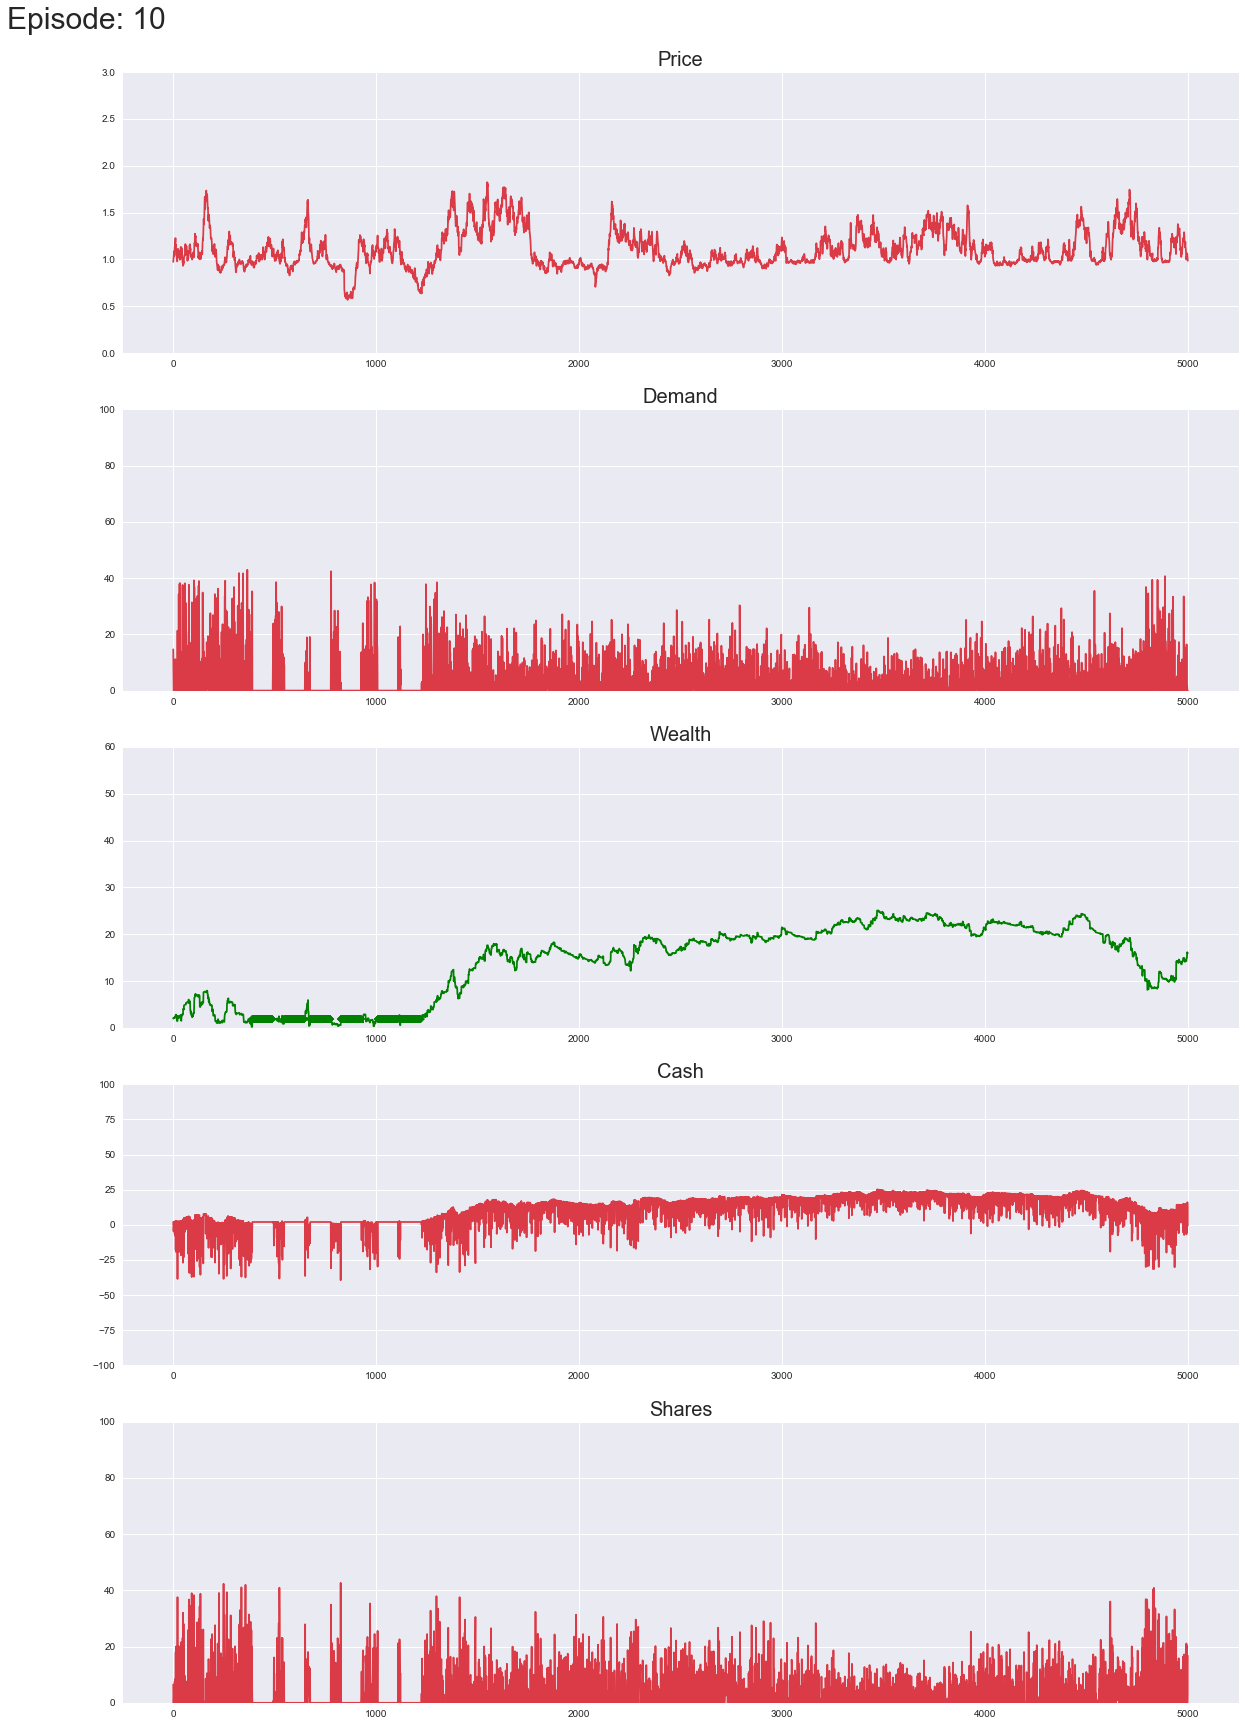

In [22]:
variables = ['Price', 'Demand', 'Wealth', 'Cash', 'Shares']

fig, axes = plt.subplots(nrows=5, ncols=1,figsize=(20,30))

episode_to_look_at = 10 

for i, ax in enumerate(axes.flatten()):
    
    variable = i
    
    episode = learning_fund_stats[episode_to_look_at]
    
    # price
    if i == 0:  
        ax.set_ylim([0,3])
        ax.plot(episode.T[i])
        
    # demand
    elif i == 1:
        ax.set_ylim([0,100])
        ax.plot(episode.T[i])
        
    # wealth
    elif i == 2:
        print(episode.T[i].shape)
        ax.set_ylim([0,60])
        markers_on = [k for k in range(len(episode.T[i])) if episode.T[i][k] == 2]   
        ax.plot(episode.T[i],'-gD', markersize=5, markevery=markers_on)
    
    # cash
    elif i == 3:
        ax.set_ylim([-100,100])
        ax.plot(episode.T[i])
    
    # shares
    else:
        ax.set_ylim([0,100])
        ax.plot(episode.T[i])
        
    ax.set_title(variables[i], {'fontsize':20})
    
# Fine-tune figure; make subplots farther from each other.
fig.suptitle("Episode: {}".format(episode_to_look_at),
             fontsize=30, x=0.1, y=0.91);

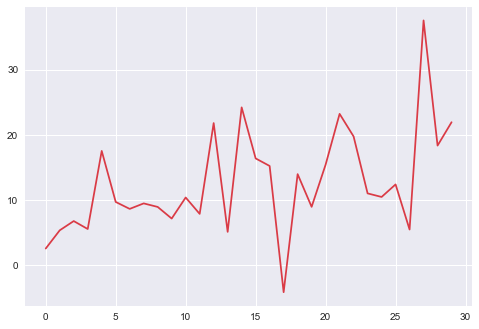

In [23]:
#plt.ylim([-90,400])
fig = plt.plot(stats)

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5,
                         sharex=True,sharey=True,
                         figsize=(50,50)
                        )

# plot all returns
#for i, ax in enumerate(axes.flatten()):
#    
#    episode = learning_fund_stats[i]
#    ax.set_ylim([-1,1])
#    ax.plot(episode.T[-1])

In [26]:
stdev_per_episode = []

for i in range(len(learning_fund_stats)):
    episode = learning_fund_stats[i]
    return_per_episode = episode.T[-1]
    stdev_per_episode.append(np.std(return_per_episode))

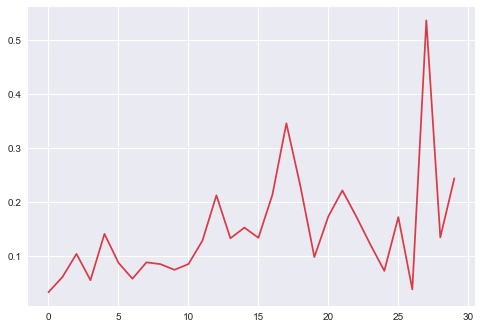

In [27]:
plt.plot(stdev_per_episode);

/Users/Simon/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


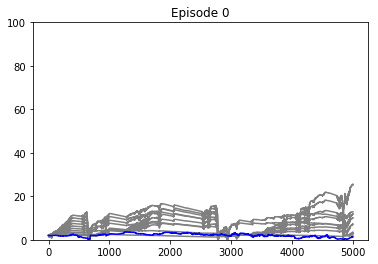

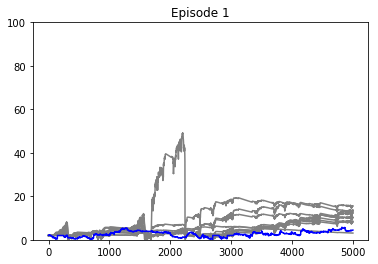

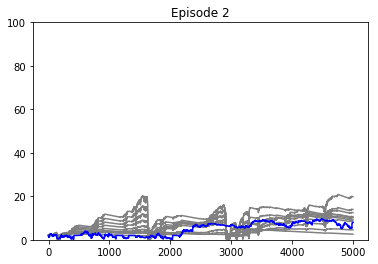

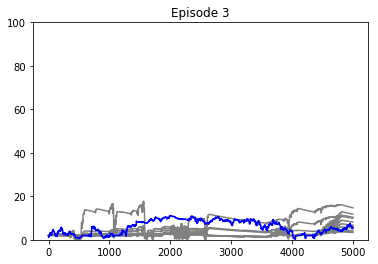

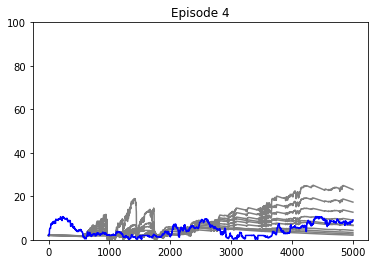

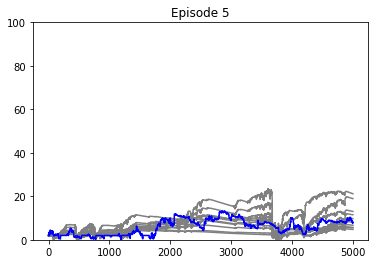

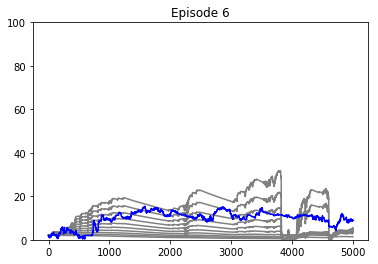

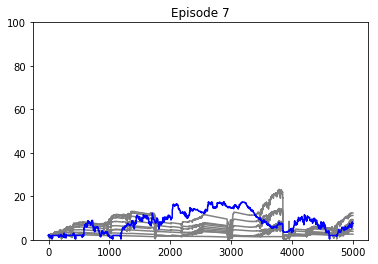

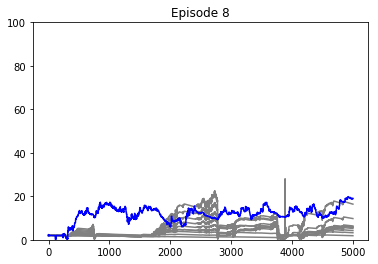

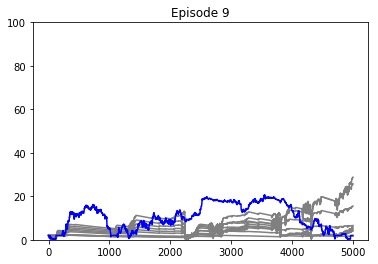

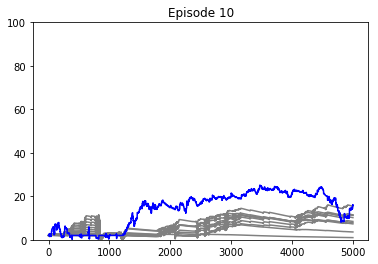

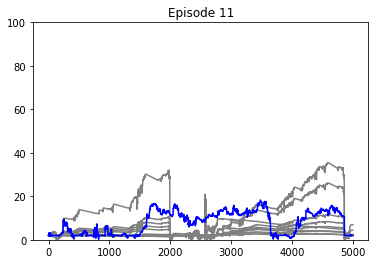

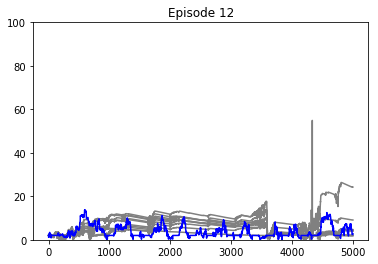

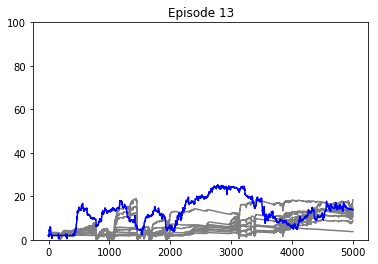

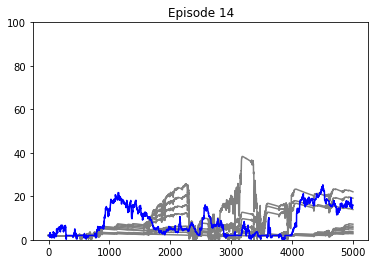

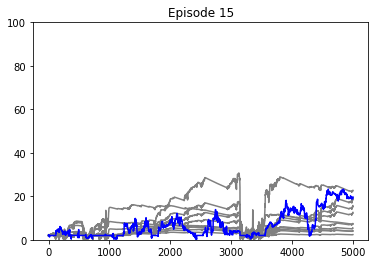

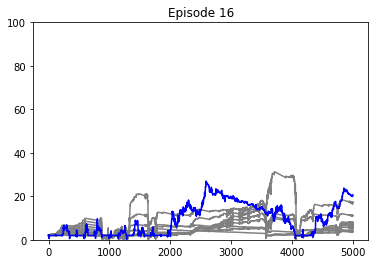

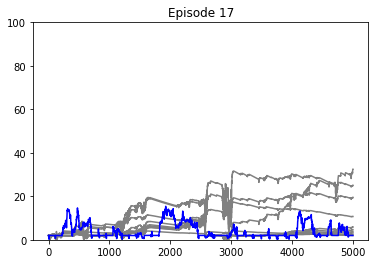

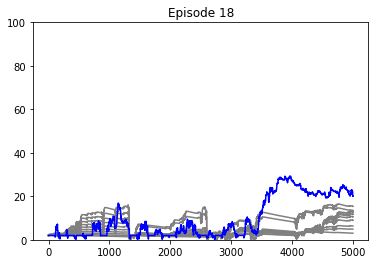

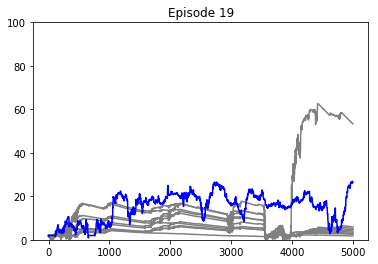

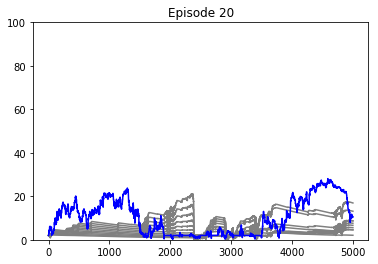

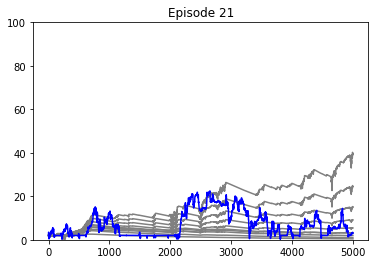

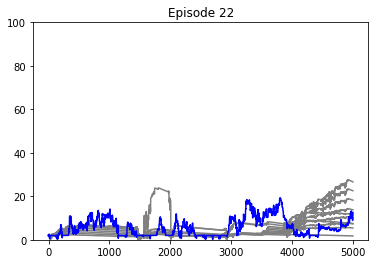

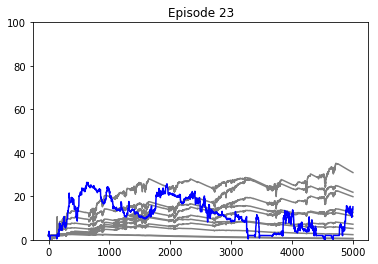

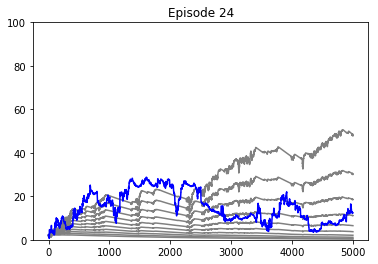

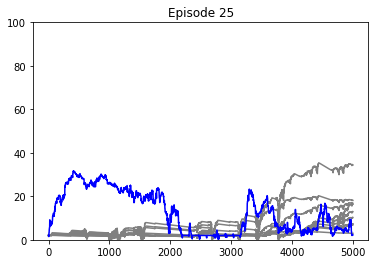

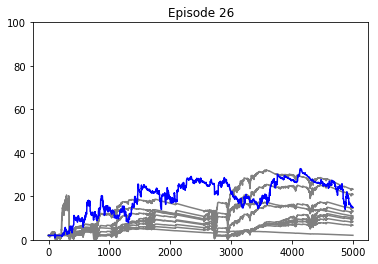

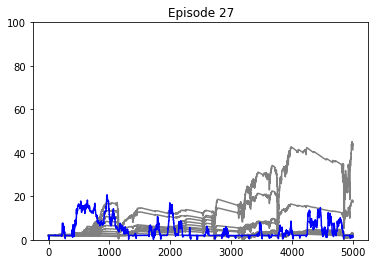

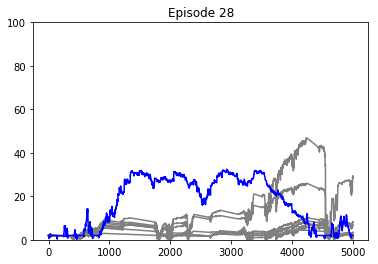

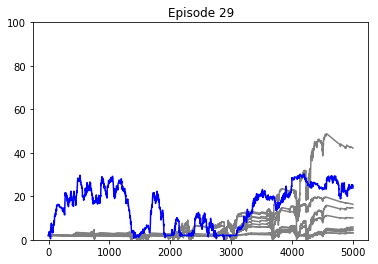

In [8]:
# make a GIF
for i in range(len(funds_wealth_all_episodes)):
    
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    
    ax.set_ylim([0,100])
    
    for j in range(11):
        episode = np.array(funds_wealth_all_episodes[i])
        if j == 10:
            ax.plot(episode.T[j], color='blue')
        else:
            ax.plot(episode.T[j], color='gray')
        
    ax.set_title("Episode {}".format(i), #{'fontsize':20}
                )
    
    #fig.savefig("./figures/GIF/{}_total_wealth.png".format(i))